In [1]:
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import silhouette_score

In [2]:
from datasets import *

In [3]:
(x,y)=DATA['iris']

In [4]:
def normalize_cols(m):
    col_max=m.max(axis=0)
    col_min=m.min(axis=0)
    return (m-col_min)/(col_max-col_min)

In [5]:
x=normalize_cols(x)

In [6]:
(n,m)=x.shape

In [7]:
import matplotlib
classes=np.unique(y)
colors=matplotlib.pyplot.cm.gist_rainbow(np.linspace(0,1,len(classes)))
#colors=matplotlib.pyplot.cm.rainbow(np.linspace(0,1,len(classes)))
cm = matplotlib.colors.ListedColormap(colors)
axiscolors=matplotlib.pyplot.cm.rainbow(np.linspace(0,1,m))

In [8]:
def StarCoordinates(m):
	theta=np.pi*2/m
	v=np.zeros((m,2))
	for i in range(m):
		v[i,0]=np.cos(i*theta)
		v[i,1]=np.sin(i*theta)
	return v

In [9]:
SC=StarCoordinates(m)

In [72]:
def Starcoor(x,anchor):
    m=len(x)
    p=np.dot(x,anchor)
    return p

In [10]:
def Radviz(x,anchor):
	m=len(x)
	p=np.dot(x,anchor)/np.sum(x)
	return p

In [11]:
def circleradviz(X,anchor):
	(n,m)=X.shape
	Y=np.zeros((n,2))
	for i in range(n):
		Y[i]=Radviz(X[i],anchor)
	return Y

In [12]:
def Classifier(x,y):
	clf=LDA()
	clf.fit(x,y)
	ac=clf.score(x,y)
	#ac=silhouette(x, y, metric='sqeuclidean')
	return ac

In [64]:

def silhouette(x,y):
    ac=silhouette_score(x, y)
    return ac

In [66]:
silhouette(x,y)

0.45745537468924596

In [13]:
A1,A2,A3,A4=0.1,0.2,0.3,0.4

In [67]:
def func_iradviz(A1,A2,A3,A4):
    Alpha=np.array([A1,A2,A3,A4])
    m=len(Alpha)
    anchor=np.zeros((m,2))
    for i in range(m):
        anchor[i,0]=np.cos(Alpha[i])
        anchor[i,1]=np.sin(Alpha[i])
        
    Y=circleradviz(x,anchor)
    #draw Radviz
    plt.figure(figsize=(5,5))
    plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='.',s=10)
    #draw unit circle
    t = np.linspace(0,2*np.pi, 100)
    plt.plot(np.cos(t),np.sin(t),alpha=0.95)
    #draw alpha point
    (n,m)=x.shape
    al=np.array([A1,A2,A3,A4])
    
    ac=silhouette_score(Y,y)#Classifier(Y,y)
    plt.text(-1,1,str(ac*100)[:5]+'%')
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    for i in range(m):
        #np.linspace(V[i,0],V[i,1], 30)
        #plt.scatter(anchor[i,0],anchor[i,1],color=axiscolors[i],size=al[i]*10,alpha=0.95)
        plt.scatter(anchor[i,0],anchor[i,1],color=axiscolors[i],alpha=0.95)
        plt.text((1+0.1)*anchor[i,0],(1+0.1)*anchor[i,1],'A'+str(i+1),color="black")
    plt.show()
    return (A1,A2,A3,A4)

In [68]:
p=interactive(func_iradviz,A1=(0,2*np.pi,0.1),A2=(0,2*np.pi,0.1),A3=(0,2*np.pi,0.1),A4=(0,2*np.pi,0.1))
display(p)

interactive(children=(FloatSlider(value=3.1, description='A1', max=6.283185307179586), FloatSlider(value=3.1, …

In [16]:
A1,A2,A3,A4=0.1,0.2,0.3,0.4

In [39]:
def bc(x,lam):
    if lam==0.0:
        return np.log(x+1)
    else:
        return (np.power(x+1,lam)-1)/lam

In [40]:
def radviz_bc(X,al,anchor):
    (n,m)=X.shape
    Y=np.zeros((n,2))
    Z=np.zeros((n,m))
    for i in range(m):
        Z[:,i]=bc(X[:,i],al[i])
    for i in range(n):
        Y[i]=Radviz(Z[i],anchor)
    return Y

In [69]:
def func_iradviz(A1,A2,A3,A4):
    Alpha=np.array([A1,A2,A3,A4])
    m=len(Alpha)
    anchor=np.zeros((m,2))
    for i in range(m):
        anchor[i,0]=np.cos(2*np.pi*i/(m*1.0))#np.cos(Alpha[i])
        anchor[i,1]=np.sin(2*np.pi*i/(m*1.0))#np.sin(Alpha[i])
        
    Y=radviz_bc(x,Alpha,anchor)
    #draw Radviz
    plt.figure(figsize=(5,5))
    plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='.',s=10)
    #draw unit circle
    t = np.linspace(0,2*np.pi, 100)
    plt.plot(np.cos(t),np.sin(t),alpha=0.95)
    #draw alpha point
    (n,m)=x.shape
    al=np.array([A1,A2,A3,A4])
    
    ac=silhouette_score(Y,y)#Classifier(Y,y)
    plt.text(-1,1,str(ac*100)[:5]+'%')
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    for i in range(m):
        #np.linspace(V[i,0],V[i,1], 30)
        #plt.scatter(anchor[i,0],anchor[i,1],color=axiscolors[i],size=al[i]*10,alpha=0.95)
        plt.scatter(anchor[i,0],anchor[i,1],color=axiscolors[i],alpha=0.95)
        plt.text((1+0.1)*anchor[i,0],(1+0.1)*anchor[i,1],'A'+str(i+1),color="black")
    plt.show()
    return (A1,A2,A3,A4)

In [70]:
p=interactive(func_iradviz,A1=(-5,5,0.1),A2=(-5,5,0.1),A3=(-5,5,0.1),A4=(-5,5,0.1))
display(p)

interactive(children=(FloatSlider(value=0.0, description='A1', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

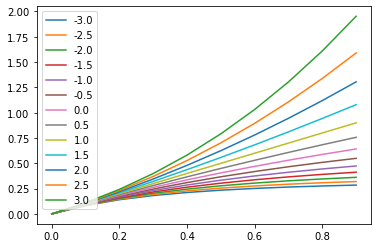

In [58]:
import numpy as np
import matplotlib.pyplot as plt
 
# evenly sampled time at 200ms intervals
t = np.arange(0., 1., 0.1)
 
fig=plt.figure()
ax=fig.add_subplot(111)
expo = np.arange(-3, 3.5, 0.5)
for lam in expo:
    ax.plot(t,bc(t,lam),label=str(lam))


plt.legend(loc=2)
plt.show()

In [73]:
def star_bc(X,al,anchor):
    (n,m)=X.shape
    Y=np.zeros((n,2))
    Z=np.zeros((n,m))
    for i in range(m):
        Z[:,i]=bc(X[:,i],al[i])
    for i in range(n):
        Y[i]=Starcoor(Z[i],anchor)
    return Y

In [74]:
def func_starcoor(A1,A2,A3,A4):
    Alpha=np.array([A1,A2,A3,A4])
    m=len(Alpha)
    anchor=np.zeros((m,2))
    for i in range(m):
        anchor[i,0]=np.cos(2*np.pi*i/(m*1.0))#np.cos(Alpha[i])
        anchor[i,1]=np.sin(2*np.pi*i/(m*1.0))#np.sin(Alpha[i])
        
    Y=star_bc(x,Alpha,anchor)
    #draw Radviz
    plt.figure(figsize=(5,5))
    plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='.',s=10)
    #draw unit circle
    t = np.linspace(0,2*np.pi, 100)
    plt.plot(np.cos(t),np.sin(t),alpha=0.95)
    #draw alpha point
    (n,m)=x.shape
    al=np.array([A1,A2,A3,A4])
    
    ac=silhouette_score(Y,y)#Classifier(Y,y)
    plt.text(-1,1,str(ac*100)[:5]+'%')
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    for i in range(m):
        #np.linspace(V[i,0],V[i,1], 30)
        #plt.scatter(anchor[i,0],anchor[i,1],color=axiscolors[i],size=al[i]*10,alpha=0.95)
        plt.scatter(anchor[i,0],anchor[i,1],color=axiscolors[i],alpha=0.95)
        plt.text((1+0.1)*anchor[i,0],(1+0.1)*anchor[i,1],'A'+str(i+1),color="black")
    plt.show()
    return (A1,A2,A3,A4)

In [76]:
p=interactive(func_starcoor,A1=(-5,5,0.1),A2=(-5,5,0.1),A3=(-5,5,0.1),A4=(-5,5,0.1))
display(p)

interactive(children=(FloatSlider(value=0.0, description='A1', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…